In [48]:
import pickle as pk
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import os

EDS_files = [
'cora_sampling_method=EDS_K_sparsity=100_results.p',
'cora_sampling_method=EDS_K_sparsity=10_results.p',
'cora_sampling_method=EDS_K_sparsity=5_results.p' ]



Greedy_files = [

'cora_sampling_method=Greedy_K_sparsity=100_label_balance=Greedy_noise=0.01_results.p',
'cora_sampling_method=Greedy_K_sparsity=100_label_balance=Greedy_noise=100_results.p',
'cora_sampling_method=Greedy_K_sparsity=100_label_balance=Greedy_noise=1_results.p',
'cora_sampling_method=Greedy_K_sparsity=10_label_balance=Greedy_noise=0.01_results.p',
'cora_sampling_method=Greedy_K_sparsity=10_label_balance=Greedy_noise=100_results.p',
'cora_sampling_method=Greedy_K_sparsity=10_label_balance=Greedy_noise=1_results.p',
'cora_sampling_method=Greedy_K_sparsity=5_label_balance=Greedy_noise=0.01_results.p',
'cora_sampling_method=Greedy_K_sparsity=5_label_balance=Greedy_noise=100_results.p',
'cora_sampling_method=Greedy_K_sparsity=5_label_balance=Greedy_noise=1_results.p']

max_files = ['cora_sampling_method=MaxDegree_maxdegree_results.p']

random_file = ['cora_sampling_method=Random_random_results.p']


In [49]:
def open_files(files):
    file_content = []
    for file in  files:
        try:
            with open(file, 'rb') as f:
                file_content.append(pk.load(f, encoding='latin1'))
        except Exception as e:
            print(e)
            print("No " + file)
    return file_content
            
eds_results = open_files(EDS_files)
geedy_results = open_files(Greedy_files)
max_results = open_files(max_files)
random_results = open_files(random_file)



In [50]:
def results_to_lines(results):
    lines = []
    for result in results:
        line = result['results']
        x = []
        y = []
        var = []
        for point in line:
            x.append(point[1])
            y.append(point[2])
            var.append(point[3])
        lines.append((x,y,var,result['info']))
    return lines

random_ref_line = results_to_lines(random_results)[0]
w = 3
#font = 15
def plot(title, save_file,lines, label_name = None):
    plt.errorbar(random_ref_line[0],random_ref_line[1],yerr=random_ref_line[2],alpha = 0.7,color = 'k',label="Random sampling",fmt='o-',linewidth=w)
    for line in lines:
        if label_name is not None:
            plt.errorbar(line[0],line[1],yerr=line[2],alpha = 0.5,label=label_name+":"+str(line[3][label_name]),fmt='o-',linewidth=w)
        else:
            plt.errorbar(line[0],line[1],yerr=line[2],alpha = 0.5,fmt='o-',linewidth=w)
    
    
    plt.xlabel('known labels of training set %',fontsize=font)
    plt.ylabel('test accuracy', fontsize=font)
   # plt.title(title)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig(os.path.join('../../report',save_file), bbox_inches="tight", dpi = 300)



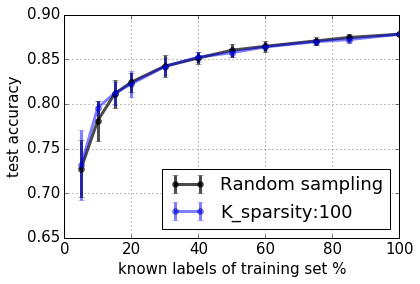

In [51]:
plot("EDS sampling","EDS_sampling_K_100.png",results_to_lines(eds_results)[0:1],'K_sparsity')


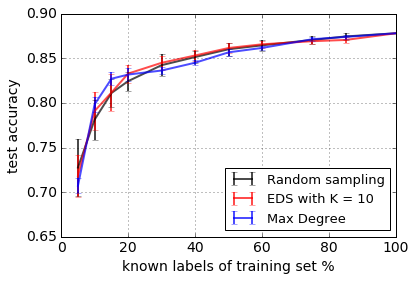

In [64]:
w = 2
plt.rcParams.update({'font.size': 14})
random_ref_line = results_to_lines(random_results)[0]
eds_10_ref_line = results_to_lines(eds_results)[1:2][0]
max_ref_line = results_to_lines(max_results)[0]
plt.errorbar(random_ref_line[0],random_ref_line[1],yerr=random_ref_line[2],alpha = 0.7,color = 'k',label="Random sampling",fmt='-',linewidth=w)
plt.errorbar(eds_10_ref_line[0],eds_10_ref_line[1],yerr=eds_10_ref_line[2],alpha = 0.7,color = 'r',label="EDS with K = 10",fmt='-',linewidth=w)
plt.errorbar(max_ref_line[0],max_ref_line[1],yerr=max_ref_line[2],alpha = 0.7,color = 'b',label="Max Degree",fmt='-',linewidth=w)

plt.xlabel('known labels of training set %')
plt.ylabel('test accuracy')

plt.legend(loc=4, prop={'size': 13})
plt.grid(True)
plt.savefig(os.path.join('../../report',"EDS_MAX.png"), bbox_inches="tight", dpi = 300)


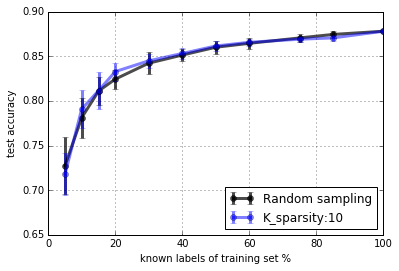

In [24]:
plot("EDS sampling","EDS_sampling_K10.png",results_to_lines(eds_results)[1:2],'K_sparsity')


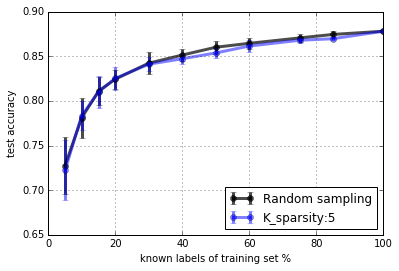

In [25]:
plot("EDS sampling","EDS_sampling_K5.png",results_to_lines(eds_results)[2:3],'K_sparsity')

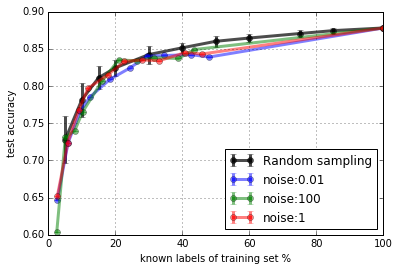

In [26]:
plot("Greedy sampling, K sparsity = 100 ","Greedy_K100_sampling.png",results_to_lines(geedy_results[0:3]),'noise')


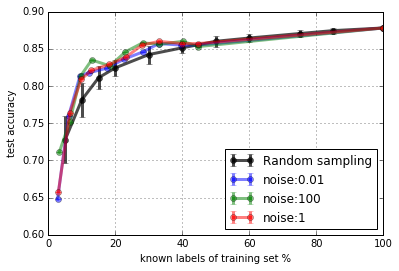

In [27]:
plot("Greedy sampling, K sparsity = 10 ","Greedy_K10_sampling.png",results_to_lines(geedy_results[3:6]),'noise')


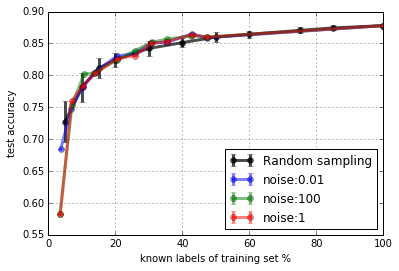

In [28]:
plot("Greedy sampling, K sparsity = 5 ","Greedy_K5_sampling.png",results_to_lines(geedy_results[6:9]),'noise')

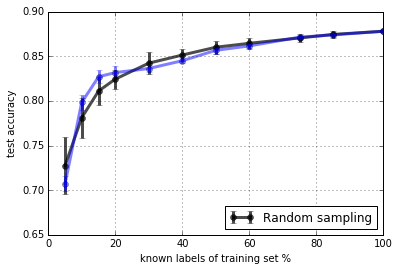

In [29]:
plot("Max degree sampling,","Max_sampling.png",results_to_lines(max_results))